#### Data gathering

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import re
import numpy as np


In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(image.content)
    
#https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [ ]:
type(image) # I had to check the datatype in order to know how best to convert it to csv.

In [4]:
image_pred =  pd.read_csv('image-predictions.tsv',sep="\t")
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [ ]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = archive_df.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
  #  for tweet_id in tweet_ids:
      #  count += 1
       # print(str(count) + ": " + str(tweet_id))
       # try:
       #     tweet = api.get_status(tweet_id, tweet_mode='extended')
        #    print("Success")
         #   json.dump(tweet._json, outfile)
          #  outfile.write('\n')
       # except tweepy.TweepError as e:
        #    print("Fail")
         #   fails_dict[tweet_id] = e
          #  pass
#end = timer()
#print(end - start)
#print(fails_dict)

 I will be using the tweet_json dataset provided by Udacity because I couldn't get the twitter API access.

In [5]:
pathlib.Path("http://localhost:8888/edit/tweet-json.txt").suffix
# I thought I was working with a JSON file until I used this module to confirm.

'.txt'

In [6]:
with open('tweet-json.txt','r',encoding = 'utf-8') as j_file:
    tweet = j_file.readlines()

In [7]:
# I will create a dictionary where I will save my extracted values from 'tweet'.
my_dict={'tweet_id' : [],
          'retweet_count' : [],
          'favorite_count' : [],
          'retweeted' : []}
    

In [8]:
def get(line, value):
    """Gets a given value from a string called line.
        
        @param line: str object
        @param val: str object
        @return: str
        """
    
    start_index = line.find(value)
    stop_index = line .find(',',start_index)
    data = line[start_index:stop_index]
    
    return data
       

In [9]:
for j in range(len(tweet)):
    line = tweet[j] 
    my_dict['tweet_id'].append(get(line, 'id'))
    my_dict['retweet_count'].append(get(line, 'retweet_count'))
    my_dict['favorite_count'].append(get(line, 'favorite_count'))
    my_dict['retweeted'].append(get(line, 'retweeted'))
    

In [10]:
tweet_df = pd.DataFrame(my_dict)
tweet_df

,tweet_id,retweet_count,favorite_count,retweeted
0,"id"": 892420643555336193","retweet_count"": 8853","favorite_count"": 39467","retweeted"": false"
1,"id"": 892177421306343426","retweet_count"": 6514","favorite_count"": 33819","retweeted"": false"
2,"id"": 891815181378084864","retweet_count"": 4328","favorite_count"": 25461","retweeted"": false"
3,"id"": 891689557279858688","retweet_count"": 8964","favorite_count"": 42908","retweeted"": false"
4,"id"": 891327558926688256","retweet_count"": 9774","favorite_count"": 41048","retweeted"": false"
...,...,...,...,...
2349,"id"": 666049248165822465","retweet_count"": 41","favorite_count"": 111","retweeted"": false"
2350,"id"": 666044226329800704","retweet_count"": 147","favorite_count"": 311","retweeted"": false"
2351,"id"": 666033412701032449","retweet_count"": 47","favorite_count"": 128","retweeted"": false"
2352,"id"": 666029285002620928","retweet_count"": 48","favorite_count"": 132","retweeted"": false"


### __Assessing Data__

For my visual assessment, I will display the whole dataset here on jupyter notebook by setting the DataFrame to display maximum  rows. 

In [ ]:
pd.set_option('display.max_rows',None)
archive_df

In [ ]:
image_pred

In [ ]:
tweet_df

From my visual assessment, I noticed;
1. Inconsitency in the dog names.
2. Repetition of dog post for dog names Cooper, Jamesey etc
3. Some dogs don't have names.
4. An impression that the dog name _not_ is not a dog
All the above from archive_df.

5. image_pred also had the same inconsistency with names.
6. tweet_df keys with the values

##### Programmatic assessment

In [ ]:
archive_df.info()

In [ ]:
sum(archive_df.duplicated())

In [ ]:
sum(archive_df.name.duplicated())

In [ ]:
archive_df['name'].value_counts()

The name column has 1399 duplicates and they are some that are not actual names. Are they truly duplicates or just a coincidence? let's dive deeper into the name column  

In [ ]:
#check the unique names
name_list = sorted(archive_df['name'].unique().tolist())
name_list

Aside from *None*, It is the inavalid names that start with small letters

In [ ]:
archive_df[archive_df['name'] == 'Cooper']

After going through a few duplicate of the dog names, it appears that the dog is most likely the same dog but the difference is that they are posted on different dates doing different things. So I'll leave the duplicates and not remove them. This can be seen in the cell above of which I used *Cooper* as example.

In [ ]:
archive_df['rating_denominator'].value_counts()

In [ ]:
print("\n".join(archive_df[archive_df['rating_denominator'] < 10].text))

From the text above:
1. the denominator rating of 0 is invalid. The actual rating is 13/10.
2. The denominator rating for Albanian Escopalian is 10 as oppossed to 2 which is indicative of the half leg. The actual rating is 9/10. 

In [ ]:
print("\n".join(archive_df[archive_df['rating_denominator'] > 10] .text))

From the text above:
1. I observed that denominator rating more than 10 had more than one dog in the picture that was rated. This was obvious with the use of plural for the dog stage.

In [ ]:
image_pred.info()

In [ ]:
tweet_df.info()

##### Quality Issues

archive_df

1. There are still some retweeted and replied posts in the dataset ---done
2. columns like 'in_reply_to_status_id', ' in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id',                   'retweeted_status_timestamp' have so many NAN values    ---done
3. invalid dognames like 'a', 'an', 'very' instead of the actual names  ---done
4. Wrong data types in tweet_id and timestamp columns       ---done
5. Rating_denominator has values above 10 and below 10. ---done


image_pred

6. p1,p2,p3 having upper and lower cases --done
7. some images are not dogs --done
8. tweet_id is integer  ---done

tweet_df

9. keys with values ---done
10. retweet_count,favorite_count are object dtype ---done
11. retweeted posts in the dataset ---done


#### Tidiness issues

1. archive_df:  _doggo, floofer, pupper, puppo_ should be in one column  --done
2. archive_df: timestamp should be separated into date and time columns  --done
3. One dataset needed.  --done 


### Cleaning data

In [11]:
# making copies of original data
archive_copy = archive_df.copy()
image_copy = image_pred.copy()
tweet_copy = tweet_df.copy()

### Issue 1
*There are still some retweeted and replied posts in the dataset*

**Define**

Delete rows with retweeted posts.

##### Code

In [12]:
retweets = archive_copy[~archive_copy['retweeted_status_id'].isna()]
for i in retweets.index:
    archive_copy.drop(index = i,inplace = True)

replies = archive_copy[~archive_copy['in_reply_to_status_id'].isna()]
for i in replies.index:
    archive_copy.drop(index = i,inplace = True)


##### Test

In [ ]:
archive_copy.info()

I had to prioritize deleting retweeted posts because the project clearly stated that only original ratings are needed and not retweets. I felt deleting that first will give my data a sense of 'completeness' in compliance with the project requirement.

### Issue 2

*keys with values in tweet_df*

**Define**

Remove the keys and leave only the values.


##### Code

In [13]:
tweet_copy =  tweet_copy.replace(to_replace = r'[\w_]+":\s', value = '', regex = True)


##### Test

In [ ]:
tweet_copy.head()

### Issue 3

*Wrong data types in tweet_id and timestamp columns*

**Define**

change tweet_id in *archive_copy and image_copy* to strings and change timestamp in *archive_copy* to datetime. 

##### code 

In [14]:
archive_copy.tweet_id = archive_copy['tweet_id'].astype(str)
archive_copy.rating_numerator = archive_copy['rating_numerator'].astype(float)
archive_copy.timestamp = archive_copy['timestamp'].apply(pd.to_datetime)
image_copy.tweet_id = image_copy['tweet_id'].astype(str)

##### Test

In [ ]:
archive_copy.info()

image_copy.info()

#### Tidiness

### Issue 4

**Define**

Merge archive_copy and tweet_copy

#### Code

In [15]:
archive_merge = pd.merge(archive_copy,tweet_copy,on = 'tweet_id',how = 'inner')

#### Test

This merge function in addition to combining both dataframes has also cleaned the retweets that were present in the tweet_copy dataframe. So I'll be testing for both cleaning operations.

In [16]:
archive_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8853,39467,false
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6514,33819,false
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,4328,25461,false
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,8964,42908,false
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,9774,41048,false


In [ ]:
retweeted_list = sorted(archive_merge['retweeted'].unique().tolist())
retweeted_list

### Issue 5

* _doggo, floofer, pupper, puppo_ should be in one column*

**Define*

Melt the columns above into one column

##### Code

In [ ]:
archive_merge.loc[(archive_merge[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

In [17]:
def get_dog_stage(row):
    '''
      Takes in a row from the DataFrame and checks whether 
      each dog stage column ("doggo", "floofer", "pupper", and "puppo")
      contains the corresponding value.
    '''
   
    if row['doggo'] == 'doggo' and row['pupper'] == 'pupper':
        return 'multiple'
    elif row['doggo'] == 'doggo' and row['floofer'] == 'floofer':
        return 'multiple'
    elif row['doggo'] == 'doggo' and row['puppo'] == 'puppo':
        return 'multiple'
    elif row['doggo'] == 'doggo':
        return 'doggo'
    elif row['floofer'] == 'floofer':
        return 'floofer'
    elif row['pupper'] == 'pupper':
        return 'pupper'
    elif row['puppo'] == 'puppo':
        return 'puppo'
    else:
        return None

archive_merge['dog_stage'] = archive_merge.apply(get_dog_stage, axis=1)
archive_merge.drop(labels = ['doggo', 'floofer','pupper', 'puppo'], axis = 1, inplace = True)

#### Code

In [ ]:
archive_merge.head(2)

### Issue 6

*timestamp should be separated into date and time columns*

**Define**

Split timestamp column to date and time and drop timestamp  and time columns as I won't need both columns for my analysis.

#### Code

In [18]:
archive_merge['date'] = [d.date() for d in archive_merge['timestamp']]
archive_merge['time'] = [d.time() for d in archive_merge['timestamp']]
archive_merge.drop(labels = ['timestamp', 'time'], axis = 1, inplace = True)

##### Test

In [ ]:
archive_merge.head(1)

### Issue 7

*Invalid dognames like 'a', 'an', 'very' instead of the actual names*

**Define**

Replace all invalid names with None

##### Code

In [19]:
invalid_names = archive_copy.name.str.extract(pat = '(^[a-z]{1,12}$)')
invalid_list =invalid_names[0].tolist()
newList = list(set([element for element in invalid_list if str(element) != "nan"])) # set was used to get the unique values
print(newList)

['one', 'a', 'this', 'officially', 'getting', 'his', 'old', 'not', 'quite', 'mad', 'unacceptable', 'life', 'all', 'infuriating', 'my', 'just', 'an', 'light', 'incredibly', 'the', 'such', 'by', 'very', 'space', 'actually']


In [20]:
# Loop to replace each non standard name (non_name).
for e in newList:
    archive_copy.name.replace(e,
                              "None",
                              inplace = True)
    

#### Test

In [ ]:
# Let's ensure all invalid names have been changed to None.
sum(archive_copy.name.isin(newList))

### Issue 8

columns like 'in_reply_to_status_id', ' in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' have so many NAN values.

**Define**

Drop columns with multiple NaN Values as they are not neccesary for my analysis. I will also drop _retweeted_ column because I have removed all retweets and don't have need for it again.

###### Code

In [21]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted']
archive_merge.drop(labels = columns, axis=1, inplace = True)

###### Test

In [ ]:
list(archive_merge.columns)

### Issue 9

*Rating_denominator has values above 10 and below 10.*
As observed during assessment:
1. Denominators above 10 have more than one dog in the picture.

**Define**

Drop the rows with denominators above and below 10 because I want to limit my analysis to ratings for pictures with only one dog..


##### Code

In [22]:
above_ten = archive_merge[archive_merge['rating_denominator'] > 10]
for i in above_ten.index:
    archive_merge.drop(index = i,inplace = True)

below_ten = archive_merge[archive_merge['rating_denominator'] < 10]
for i in below_ten.index:
    archive_merge.drop(index = i,inplace = True)


##### Test

In [ ]:
archive_merge['rating_denominator'].unique()

### Issue 10

*retweet_count,favorite_count are object dtype.*

**Define**

Change data type to integer.


##### Code

In [23]:
archive_merge = archive_merge.astype({'retweet_count': 'int64', 'favorite_count': 'int64'})

##### Test

In [ ]:
archive_merge.dtypes

### Issue 11

*p1,p2,p3 having upper and lower cases*

**Define**
Change the names to lower case.

#### Code

In [24]:
image_copy.p1 = image_copy.p1.str.lower()
image_copy.p2 = image_copy.p2.str.lower()
image_copy.p3 = image_copy.p3.str.lower()

#### Test

In [ ]:
image_copy.head()

### Issue 12

*some images are not dogs*

**Define**

Drop rows where images are not those of dogs

#### Code

In [25]:
not_dogs = list(image_copy.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
image_copy.drop(index= not_dogs,inplace=True)

#### Test

In [ ]:
image_copy.query("p1_dog==False and p2_dog==False and p3_dog == False").index

From image_copy, I'll  take the dog breed with the most confident algorithm (p1) and merge with archive_merge to create my master data.

In [26]:
# merge only the 'p1' column from image_copy to archive_merge
master_data = pd.merge(archive_merge, image_copy[['tweet_id', 'p1']], on='tweet_id')
master_data = master_data.rename(columns={'p1': 'breed'}) # changing to a more descriptive column name

In [ ]:
master_data.head(2)

### Storing data

In [27]:
master_data.to_csv('twitter_archive_master.csv',index = False)

### Analysis and Visualisation

In [28]:
# I'll load the master dataset
viz = pd.read_csv('twitter_archive_master.csv')

In [ ]:
viz.info()

The viz data has date as object and tweet_id as integer. I'll change that before going to  visualisation.

In [29]:
viz['date'] = viz['date'].apply(pd.to_datetime)
viz['tweet_id'] = viz['tweet_id'].astype(str)

In [ ]:
#let's check the distribution of numerical values
viz.describe()

Looking at the distribution, it can be seen that there more favorite counts than retweet counts. This is suggestive of the fact that most people don't retweet but are more likely to like the tweet. 

#### 1. what has been the trend of retweet and favorite count over time?

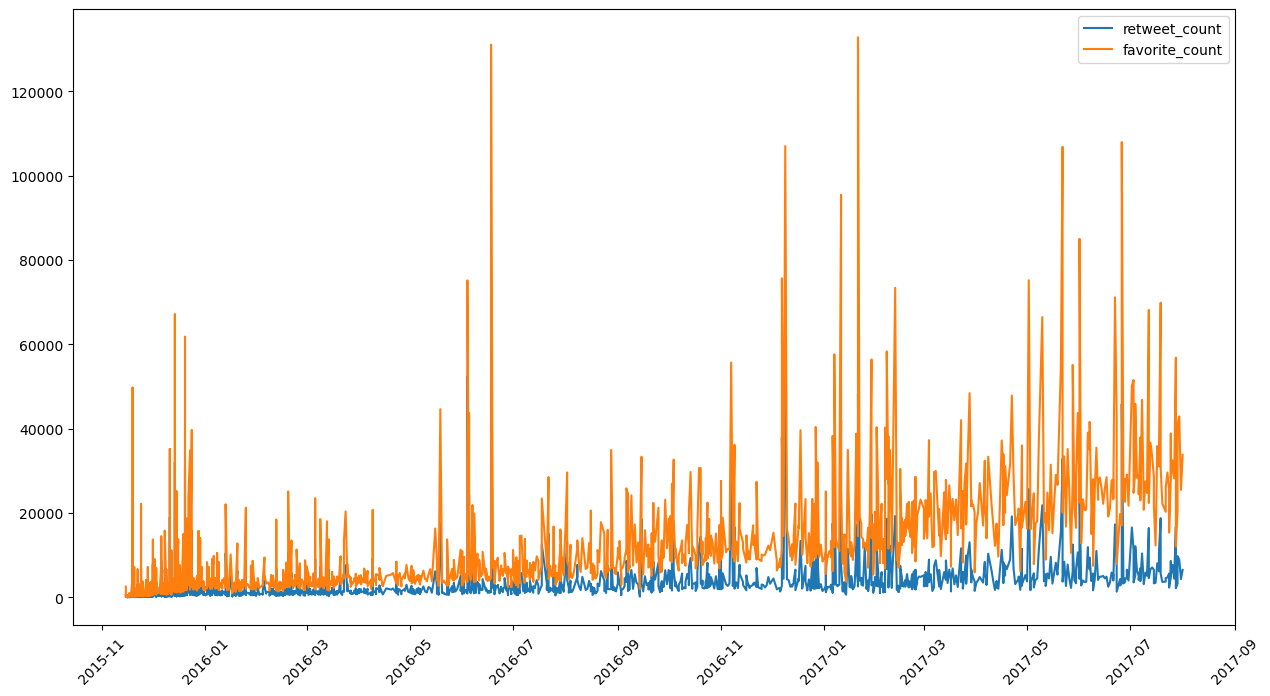

In [30]:
plt.figure(figsize = (15,8))
plt.plot('date', 'retweet_count', data = viz)
plt.plot('date', 'favorite_count', data = viz)
plt.xticks(rotation = 45)
plt.legend();

The basic line graph contains so much noise. In other to reduce the noise, I will use rolling average to plot the line chart.

In [31]:
viz['retweet_rolling_average'] = viz.retweet_count.rolling( 10).mean()
viz['favorite_rolling_average'] = viz.favorite_count.rolling( 10).mean()


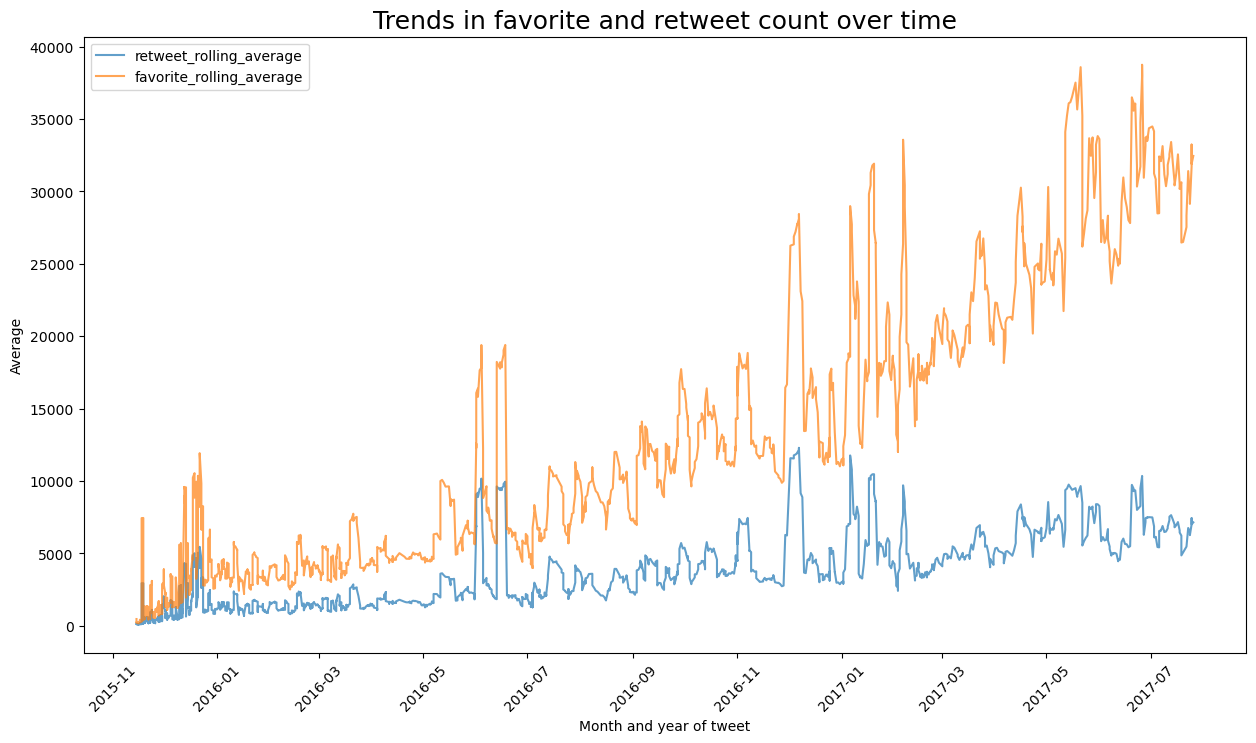

In [32]:
plt.figure(figsize = (15,8))
plt.plot('date', 'retweet_rolling_average', data = viz, alpha = 0.7)
plt.plot('date', 'favorite_rolling_average', data = viz, alpha = 0.7)
plt.xticks(rotation = 45)
plt.legend()
plt.xlabel('Month and year of tweet')
plt.ylabel('Average')
plt.title('Trends in favorite and retweet count over time', fontsize = 18);

From this plot, it can be seen that there is an increase in the number of favorite and retweet counts with favorite counts having a more spontaneaous increase in the number. It can also be seen that spikes in favourite count is accompanied by spikes in retweet counts.

#### 2. What is the most popuar dog breed?

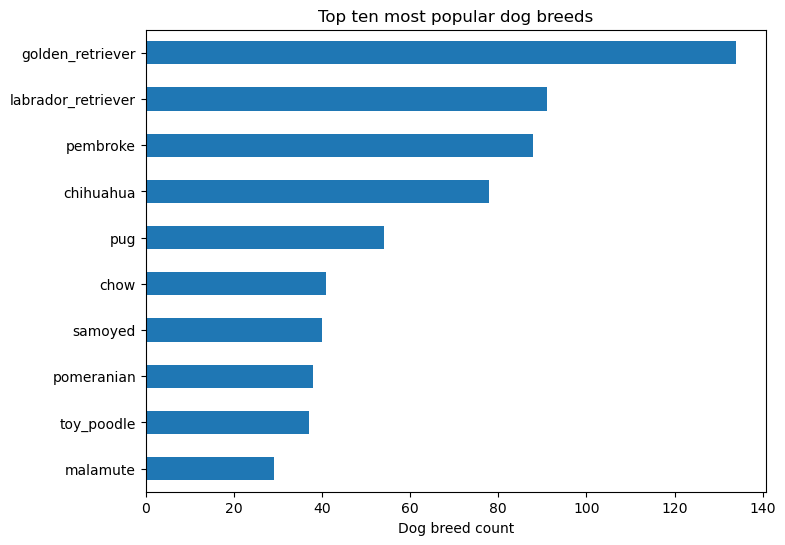

In [33]:
viz['breed'].value_counts().nlargest(10).plot(kind = 'barh', figsize = (8,6))
plt.xlabel('Dog breed count')
plt.gca().invert_yaxis()  # invert the y-axis so the highest count is at the top
plt.title('Top ten most popular dog breeds', fontsize = 12);

The most popular dog breed is the golden retreiver

#### 3. Is there any correlation between retweet counts and favorite counts?

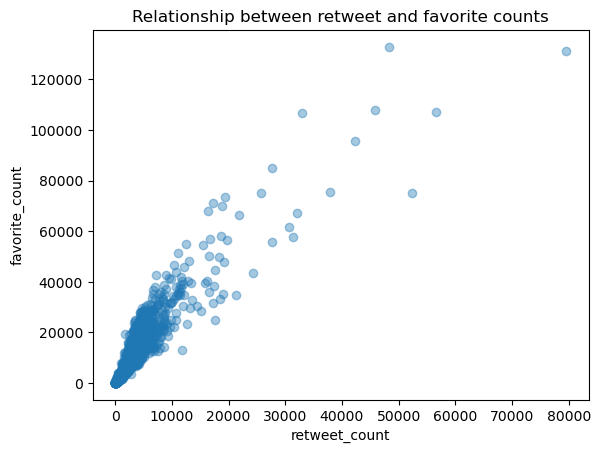

In [34]:
plt.scatter(x= 'retweet_count', y = 'favorite_count', data = viz, alpha = 0.4)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Relationship between retweet and favorite counts', fontsize = 12);

In [35]:
cols = ['retweet_count', 'favorite_count']
viz[cols].corr().style.background_gradient(cmap='Greens')

,retweet_count,favorite_count
retweet_count,1.000000,0.913438
favorite_count,0.913438,1.000000


There is a stong positive correlation between retweet and favorite count. The correlation value is 0.913314